Predicting the quality of red wine ppt

https://drive.google.com/file/d/1JXQ1vsA3VTAVe011kVc1VH3D3gjlXQZN/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

In [ ]:
df=pd.read_csv('/content/Red wine.csv')
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     red            7.4             0.700         0.00             1.9   
1     red            7.8             0.880         0.00             2.6   
2     red            7.8             0.760         0.04             2.3   
3     red           11.2             0.280         0.56             1.9   
4     red            7.4             0.700         0.00             1.9   
...   ...            ...               ...          ...             ...   
1594  red            6.2             0.600         0.08             2.0   
1595  red            5.9             0.550         0.10             2.2   
1596  red            6.3             0.510         0.13             2.3   
1597  red            5.9             0.645         0.12             2.0   
1598  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1594      0.090                 32.0                  44.0  0.99490  3.45   
1595      0.062                 39.0                  51.0  0.99512  3.52   
1596      0.076                 29.0                  40.0  0.99574  3.42   
1597      0.075                 32.0                  44.0  0.99547  3.57   
1598      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
1594       0.58     10.5        5  
1595       0.76     11.2        6  
1596       0.75     11.0        6  
1597       0.71     10.2        5  
1598       0.66     11.0        6  

[1599 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [ ]:
df.shape

(1599, 13)

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<ipython-input-140-64027deef830>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-141-79604cdc867e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

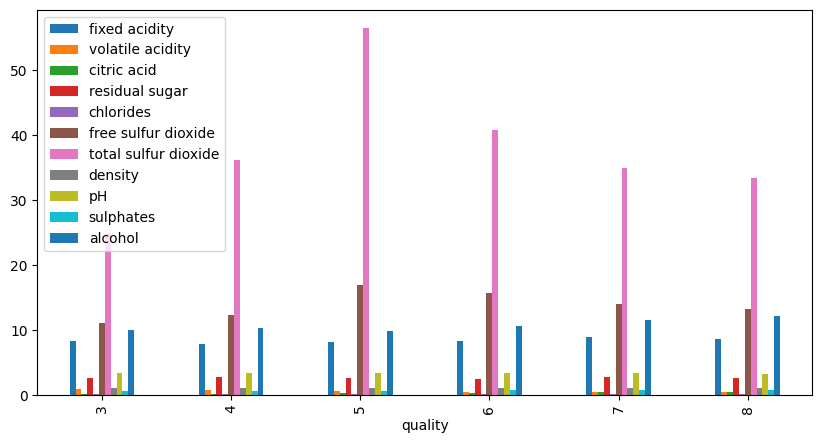

In [ ]:
average_quality = df.groupby("quality").mean()
average_quality.plot(kind="bar",figsize=(10,5))
average_quality

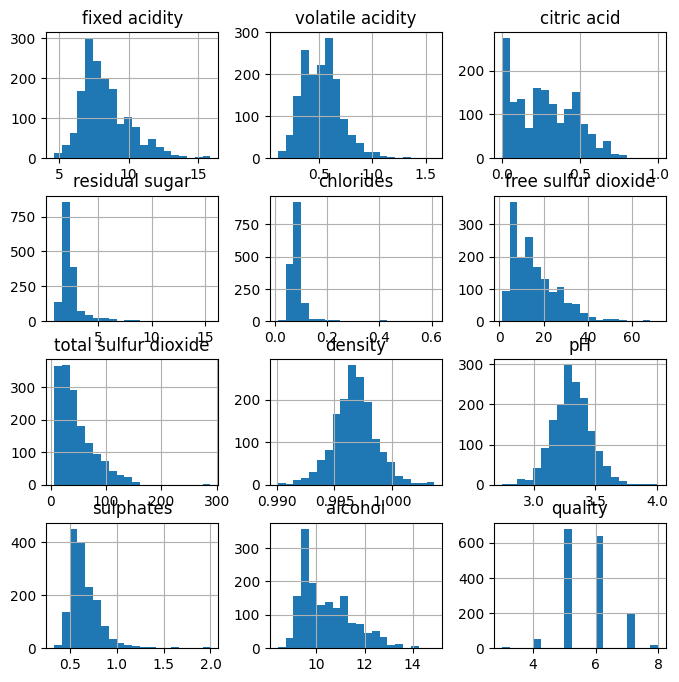

In [ ]:
df.hist(bins=20, figsize=(8, 8))
plt.show()

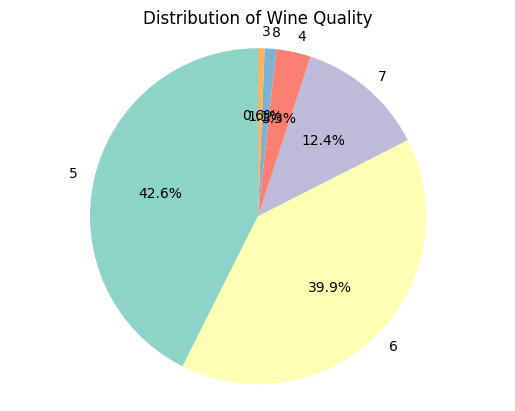

In [ ]:
# Assuming df is your DataFrame with the 'quality' column
# You can adjust the data based on your specific use case

# Calculate the counts for each unique value in the 'quality' column
quality_counts = df['quality'].value_counts()

# Extract labels and values for the pie chart
labels = quality_counts.index
values = quality_counts.values

# Set up the figure and axis
fig, ax = plt.subplots()

# Create a pie chart
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set the title
plt.title('Distribution of Wine Quality')

# Show the plot
plt.show()

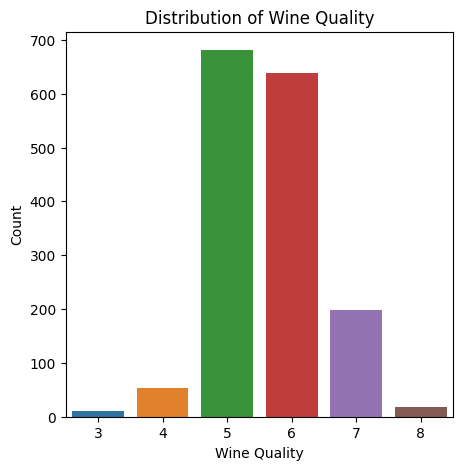

In [ ]:
plt.figure(figsize=(5, 5))
sb.countplot(data=df, x='quality')#, palette='Set2')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

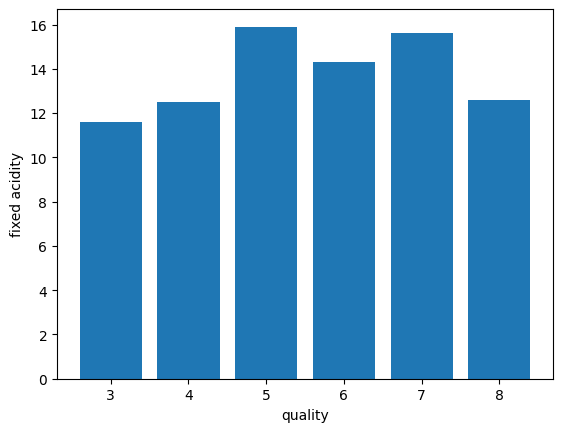

In [ ]:
plt.bar(df['quality'], df['fixed acidity'])
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

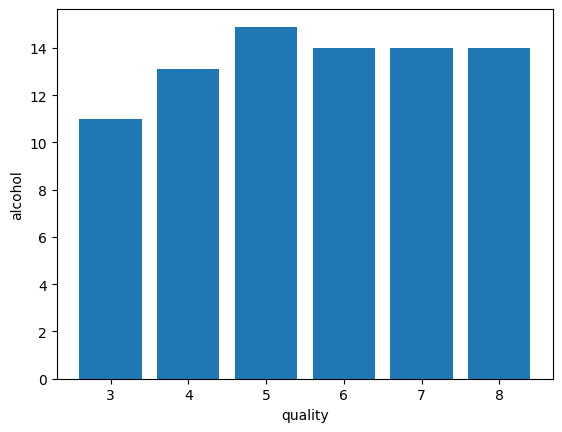

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


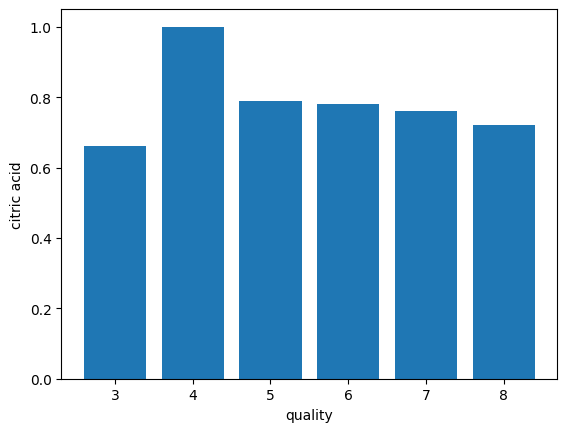

In [ ]:
plt.bar(df['quality'], df['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()


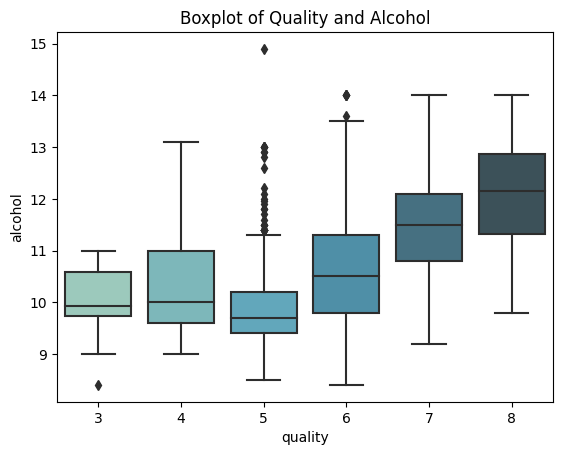

In [ ]:
sb.boxplot(x='quality',y='alcohol',data = df, palette='GnBu_d')
plt.title('Boxplot of Quality and Alcohol')
plt.show()

PAIRPLOT USING KERNEL DENSITY ESTIMATION

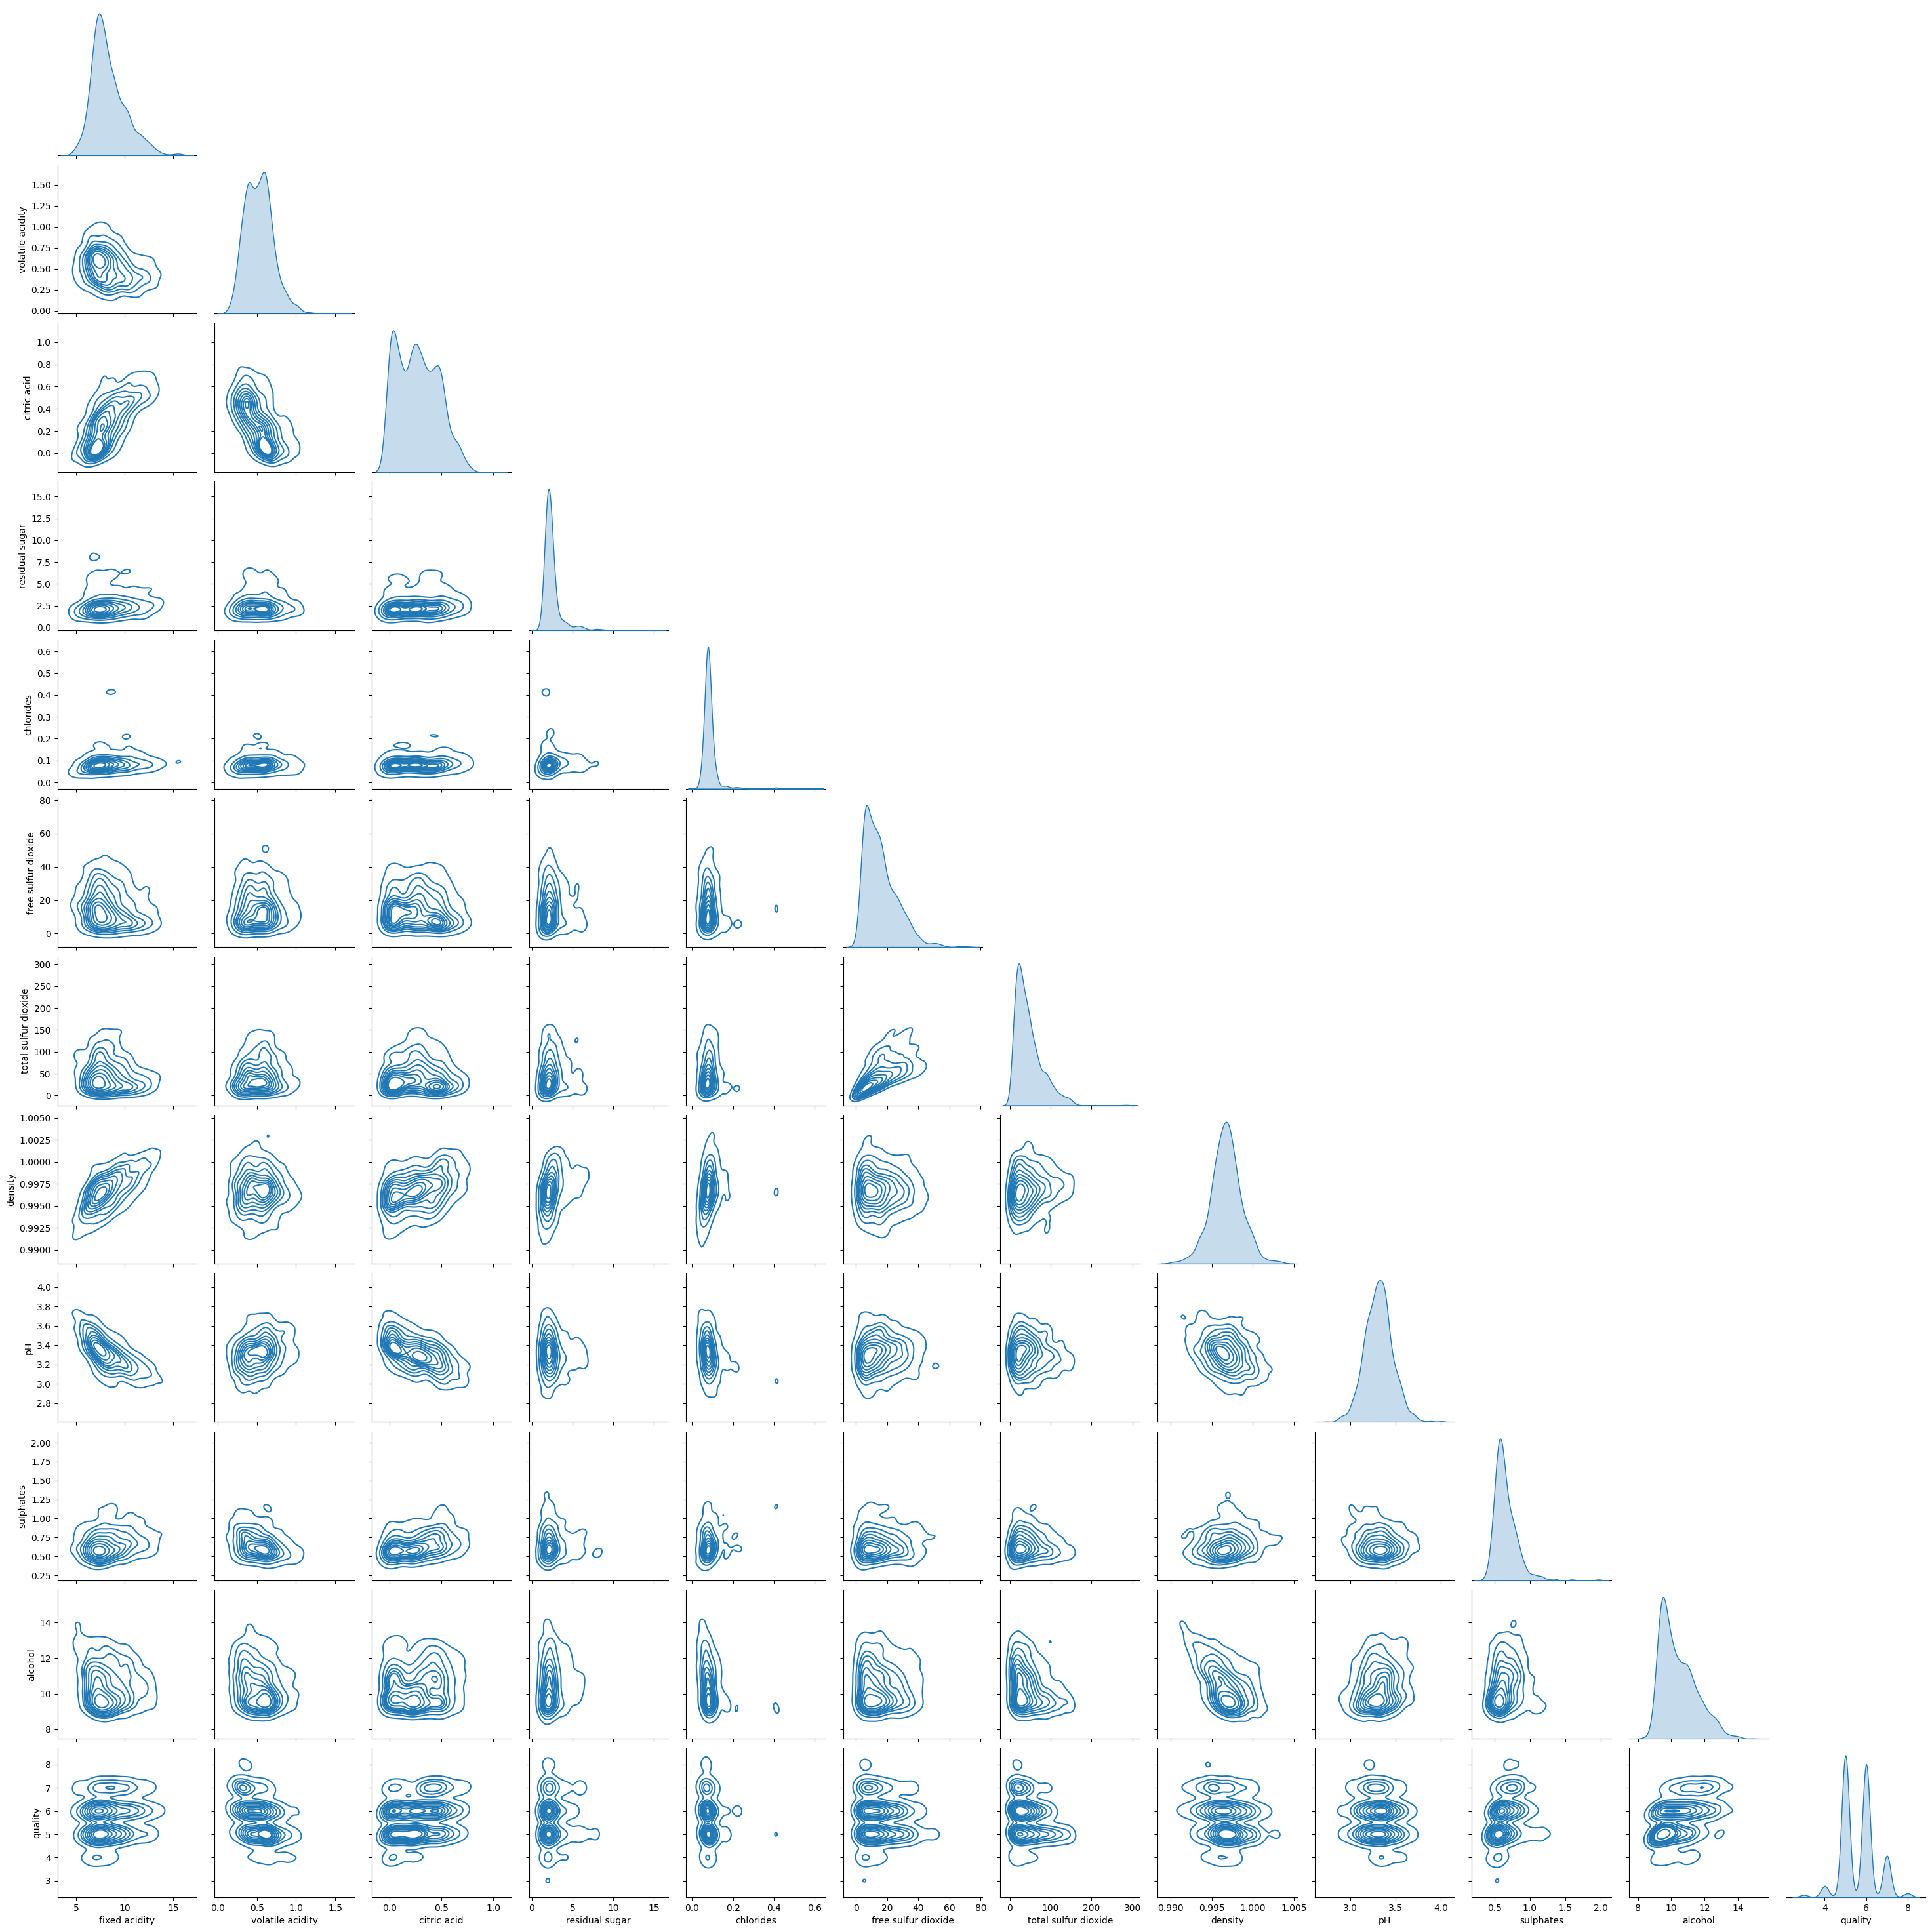

In [ ]:
sb.pairplot(df, kind="kde",corner=True)

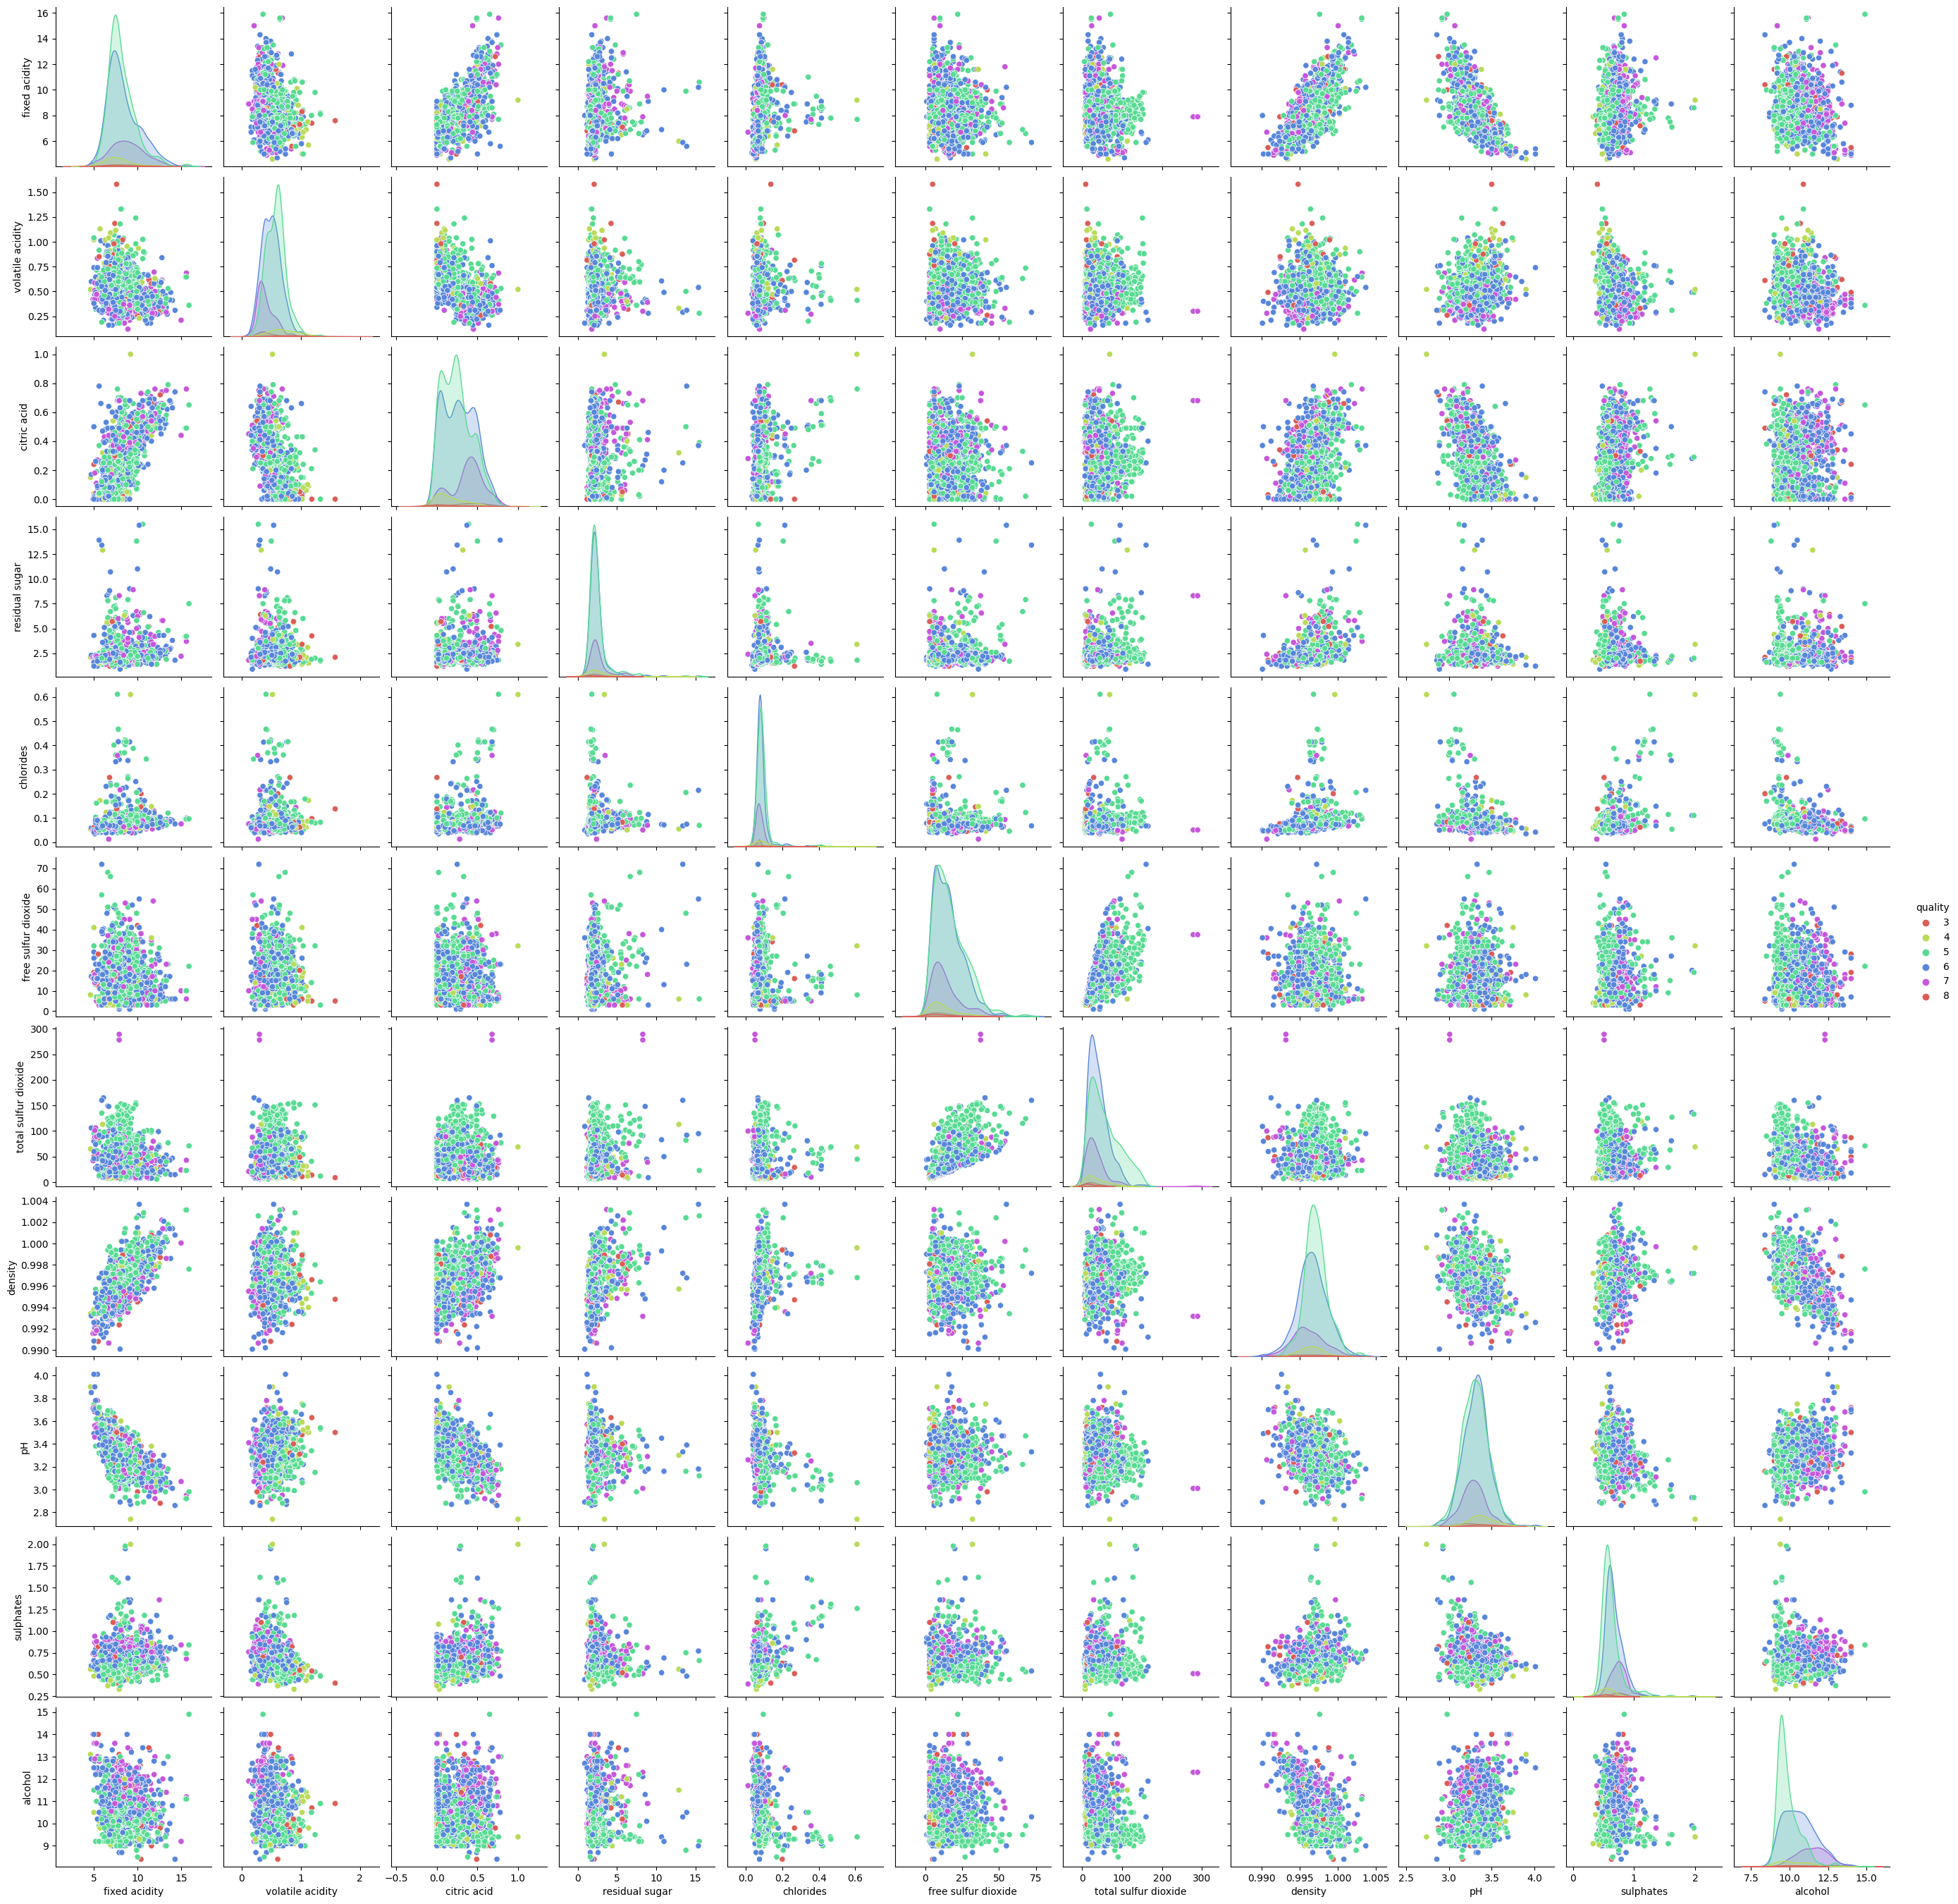

In [ ]:
sb.pairplot(df, hue = 'quality', palette='hls')
plt.savefig('pairplot.png')

SCATTER PLOT

In [ ]:
px.scatter(df, x="density", y="fixed acidity",animation_frame="quality")

<ipython-input-109-432132c89c22>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



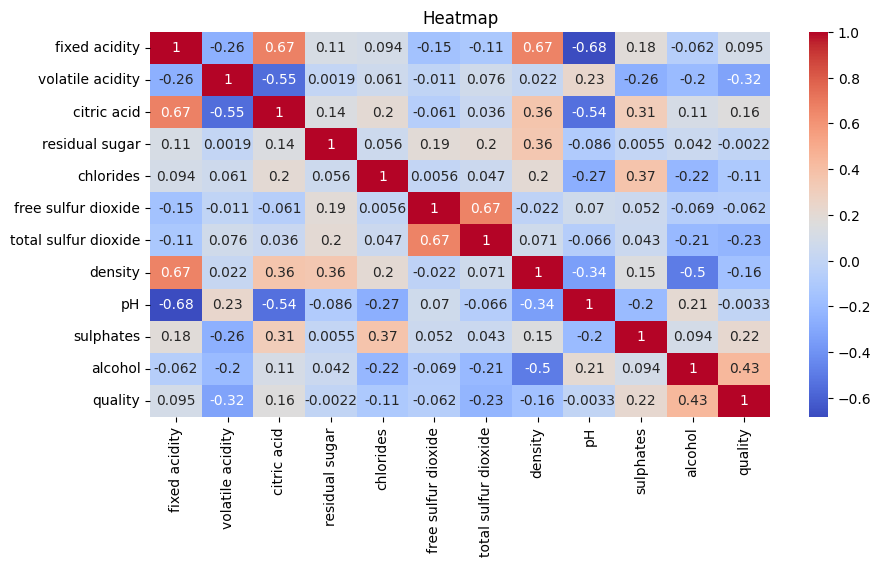

In [ ]:
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Heatmap')
plt.show()

In [ ]:
df['quality'] = df['quality'].replace([3, 4, 5], 0).replace([6, 7, 8], 1)
df['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
le.fit(df['type'])
type_encoded=le.transform(df['type'])
df['type_encoded']=type_encoded
df.pop('type')

0       red
1       red
2       red
3       red
4       red
       ... 
1594    red
1595    red
1596    red
1597    red
1598    red
Name: type, Length: 1599, dtype: object

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.785


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.785


SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
svm.SVC(kernel='linear')

SVC(kernel='linear')

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
df=pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df

Actual  Predict
453        1        1
1415       0        0
1242       1        1
885        0        0
488        1        1
...      ...      ...
296        0        0
94         0        0
232        1        1
1115       1        1
768        1        0

[400 rows x 2 columns]

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.715


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.72


K_Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df

Actual  Predict
453        1        1
1415       0        0
1242       1        0
885        0        1
488        1        0
...      ...      ...
296        0        0
94         0        1
232        1        1
1115       1        1
768        1        0

[400 rows x 2 columns]

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.6775


BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
num_classifiers = 10

In [ ]:
bagging_classifier = BaggingClassifier(model, n_estimators=num_classifiers, random_state=100)

In [ ]:
bagging_classifier=bagging_classifier.fit(X_train, y_train)

In [ ]:
y_pred=bagging_classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.815


XG BOOST

In [ ]:
from xgboost import XGBClassifier
xgboost= XGBClassifier(n_estimators=1000, learning_rate=0.05)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgboost.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.7775


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape,X_test.shape

((1199, 12), (400, 12))

In [ ]:
y_pred = gbr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
print("Accuracy.",metrics.accuracy_score(y_test,y_pred))

Accuracy. 0.7475


CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report
# Aussuming you have a list of models and corresponding names
models=[
    ("RandomForestClassifier", model),
    ("DecisionTreeClassifier",dtc),
    ("Support Vector Machine",model),
    ("KNeighborsClassifier",model),
    ("NAIVE BAYES",gnb),
    ("BaggingClassifier",model),
    ("XGBClassifier",model),
    ("GradientBoostingClassifier",model)
]

for model_name, model in models:
  # Train the model (if not already trained)
  model.fit(X_train,y_train)

  # Make predictions
  y_pred=model.predict(X_test)

  # Generate a classification report
  report=classification_report(y_test,y_pred)

  # Print the model name and its classification report
  print(f"Model: {model_name}")
  print(report)
  print('\n')

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       213
           1       0.71      0.81      0.76       187

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       213
           1       0.71      0.79      0.75       187

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       213
           1       0.71      0.79      0.75       187

    accuracy                           0.75       400
   macro avg       0.75      0.75 

MULTI COLLINEARITY

In [ ]:
#Checking for Mutlicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
#Printing the VIF values
calc_vif(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

invalid value encountered in double_scalars



variables          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866
11          type_encoded          NaN

NEURAL NETWORK

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy=model.evaluate(X_test,y_test)
print(f"Accuracy: {accuracy*100:2f}%")

Epoch 1/10
33/33 [==============================] - 4s 18ms/step - loss: 0.6055 - accuracy: 0.7103 - val_loss: 0.5642 - val_accuracy: 0.7268
Epoch 2/10
33/33 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.7421 - val_loss: 0.5493 - val_accuracy: 0.7107
Epoch 3/10
33/33 [==============================] - 0s 6ms/step - loss: 0.5049 - accuracy: 0.7584 - val_loss: 0.5275 - val_accuracy: 0.7286
Epoch 4/10
33/33 [==============================] - 0s 7ms/step - loss: 0.4886 - accuracy: 0.7671 - val_loss: 0.5220 - val_accuracy: 0.7286
Epoch 5/10
33/33 [==============================] - 0s 10ms/step - loss: 0.4798 - accuracy: 0.7738 - val_loss: 0.5152 - val_accuracy: 0.7304
Epoch 6/10
33/33 [==============================] - 0s 12ms/step - loss: 0.4748 - accuracy: 0.7767 - val_loss: 0.5122 - val_accuracy: 0.7393
Epoch 7/10
33/33 [==============================] - 0s 12ms/step - loss: 0.4705 - accuracy: 0.7786 - val_loss: 0.5065 - val_accuracy: 0.7411
Epoch 8/10
33/33